In [1]:
#Importamos los paquetes y modulos necesarios 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:

ruta_archivo = "/Users/fredmulato/Desktop/df_creditos.csv"


In [3]:
df_creditos_personal = pd.read_csv(ruta_archivo)

In [4]:
df_creditos_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID del Cliente        5000 non-null   int64 
 1   Edad del Cliente      5000 non-null   int64 
 2   Cartera Por Edad      5000 non-null   object
 3   Años Experiencia      5000 non-null   int64 
 4   Ingresos Anual        5000 non-null   int64 
 5   Ingresos Mensual      5000 non-null   int64 
 6   Tipo de Cliente       5000 non-null   object
 7   Nivel de Educación    5000 non-null   object
 8   Codigo Postal         5000 non-null   int64 
 9   Miembros Familia      5000 non-null   int64 
 10  Promedio Gasto TDC    5000 non-null   int64 
 11  Valor de Hipoteca     5000 non-null   int64 
 12  Cliente con TDC       5000 non-null   object
 13  Cliente ACCA          5000 non-null   object
 14  Cliente con Cuenta    5000 non-null   object
 15  Cliente con Deposito  5000 non-null   

In [6]:
#Como podemos verificar el DataFrame tiene 5000 datos de los cuales hay cero nulos. 

In [5]:
#Vemos el contenido del DataFrame

df_creditos_personal

,ID del Cliente,Edad del Cliente,Cartera Por Edad,Años Experiencia,Ingresos Anual,Ingresos Mensual,Tipo de Cliente,Nivel de Educación,Codigo Postal,Miembros Familia,Promedio Gasto TDC,Valor de Hipoteca,Cliente con TDC,Cliente ACCA,Cliente con Cuenta,Cliente con Deposito,Cliente Digital
0,1,25,Cartera Joven,1,49000,4083,Banca Personal,No graduado,91107,4,1600,0,No,No,Si,No,No
1,2,45,Adulto y Familias,19,34000,2833,Banca Personal,No graduado,90089,3,1500,0,No,No,Si,No,No
2,3,39,Adulto y Familias,15,11000,916,Clientes Básicos,No graduado,94720,1,1000,0,No,No,No,No,No
3,4,35,Adulto y Familias,9,100000,8333,Clientes Preferencial,Graduado,94112,1,2700,0,No,No,No,No,No
4,5,35,Adulto y Familias,8,45000,3750,Banca Personal,Graduado,91330,4,1000,0,Si,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,Cartera Joven,3,40000,3333,Banca Personal,Profesional,92697,1,1900,0,No,No,No,No,Si
4996,4997,30,Cartera Joven,4,15000,1250,Banca Personal,No graduado,92037,4,400,85000,No,No,No,No,Si
4997,4998,63,Jubilados y Adultos Mayores,39,24000,2000,Banca Personal,Profesional,93023,2,300,0,No,No,No,No,No
4998,4999,65,Jubilados y Adultos Mayores,40,49000,4083,Banca Personal,Graduado,90034,3,500,0,No,No,No,No,Si


In [7]:
# No existen duplicados 


duplicados = df_creditos_personal.duplicated()
duplicados.value_counts()

False    5000
Name: count, dtype: int64

In [8]:
# Vamos a detectar Outliers, para las columnas de Edad del cliente e Ingresos Mensual 

def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [9]:
def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [10]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

(2,)


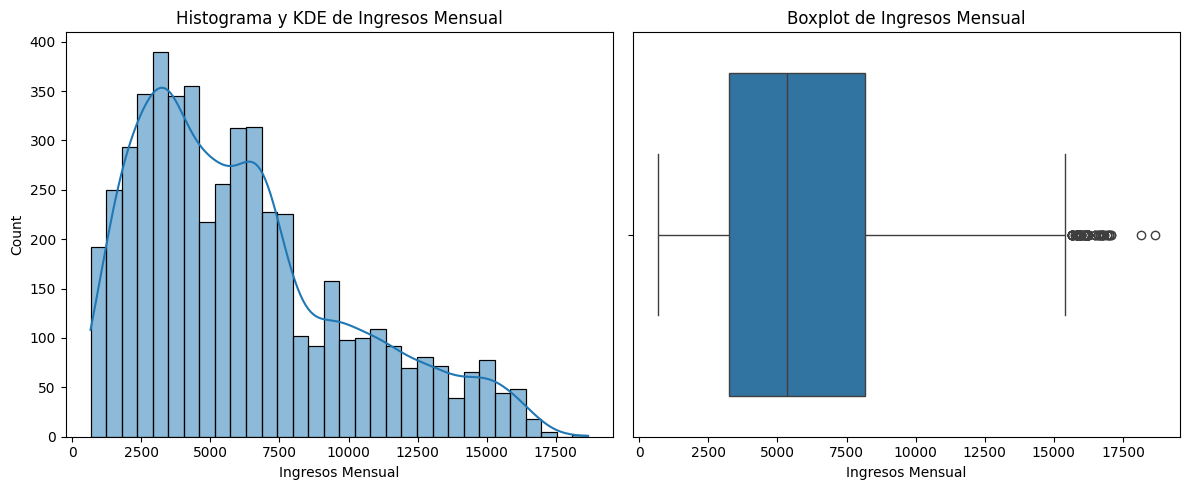

(2,)


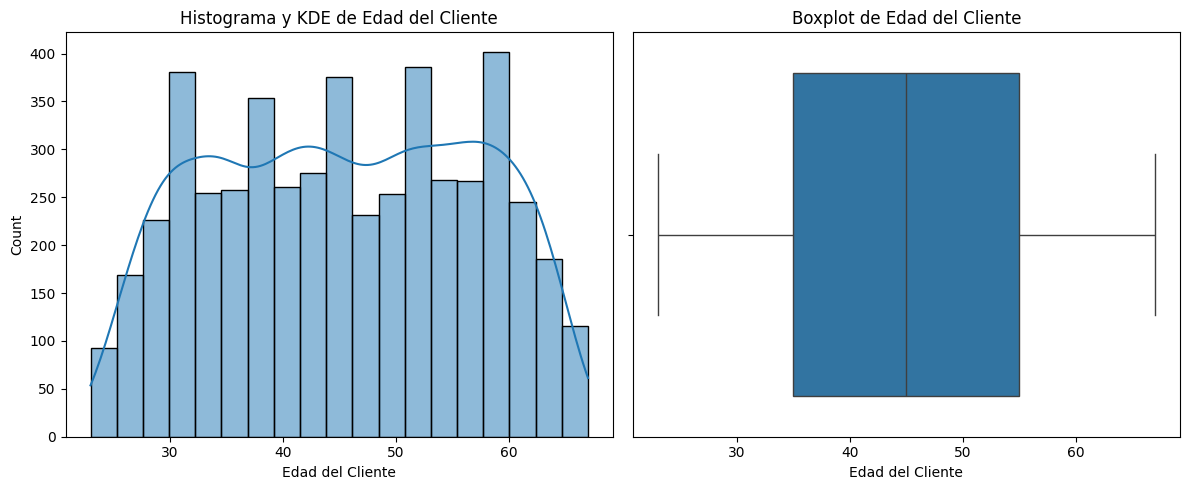

(2,)


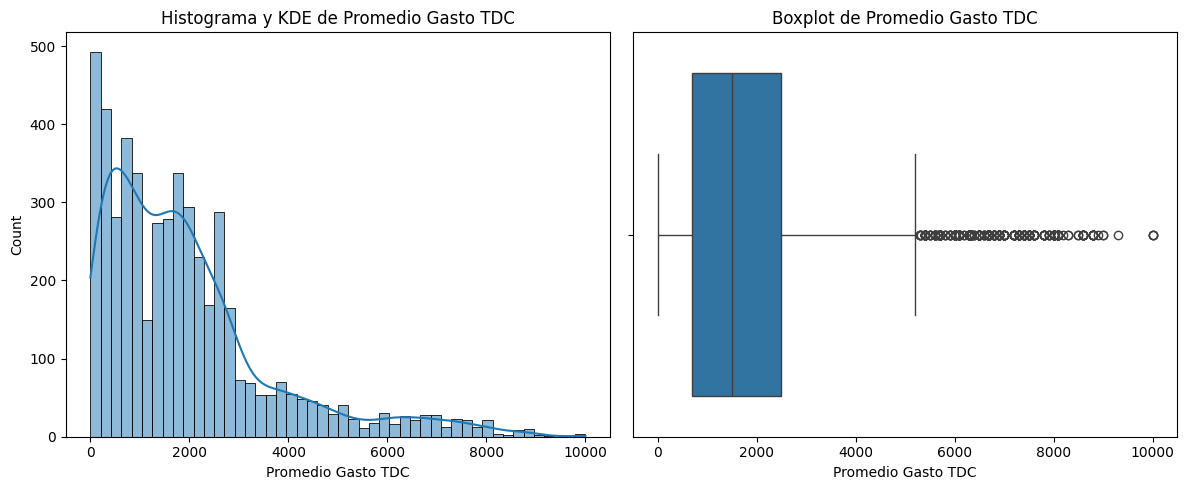

In [12]:
plot_combined_graphs(df_creditos_personal, ["Ingresos Mensual"])
plot_combined_graphs(df_creditos_personal, ["Edad del Cliente"])
plot_combined_graphs(df_creditos_personal, ["Promedio Gasto TDC"])

In [14]:
# Para tratar los Outliers o más bien ver oportunidades de negocios o tambien definir politicas de creditos he segmentados los niveles de ingresos como la edad de los clientes. Acontinuación muestro tablas con el detalle.


tabla_tipo_cliente = df_creditos_personal.groupby("Tipo de Cliente").size().reset_index(name="Total")
tabla_tipo_cliente

,Tipo de Cliente,Total
0,Banca Personal,2151
1,Clientes Básicos,129
2,Clientes Oro,868
3,Clientes Preferencial,1852


In [16]:
tabla_cartera_cliente = df_creditos_personal.groupby("Cartera Por Edad").size().reset_index(name="Total")
tabla_cartera_cliente

,Cartera Por Edad,Total
0,Adulto y Familias,1895
1,Adultos Consolidados,1934
2,Cartera Joven,624
3,Jubilados y Adultos Mayores,547
